In [ ]:
!pip install -U --pre tensorflow=="2.*"
!pip install tf_slim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13

In [ ]:
import tensorflow as tf

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2, time, os, tensorflow as tf
import numpy as np

from tensorflow.python.keras.utils.data_utils import get_file

In [ ]:
np.random.seed(31)

In [ ]:
with open('coco.names', 'r') as f:
  classessList = f.read().splitlines()

In [ ]:
classessList

['__Background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'street sign',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'hat',
 'backpack',
 'umbrella',
 'shoe',
 'eye glasses',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'plate',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'mirror',
 'dining table',
 'window',
 'desk',
 'toilet',
 'door',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'blender',
 'book',
 'cloc

In [ ]:
colorList = np.random.uniform(low=0, high=255, size=(len(classessList), 3))

In [ ]:
print(len(classessList), len(colorList))

92 92


In [ ]:
#model_url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz'

In [ ]:
model_url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/mask_rcnn_inception_resnet_v2_1024x1024_coco17_gpu-8.tar.gz'

In [ ]:
filename = os.path.basename(model_url)

In [ ]:
modelName = filename[:filename.index('.')]
modelName

'mask_rcnn_inception_resnet_v2_1024x1024_coco17_gpu-8'

In [ ]:
os.makedirs("./pretrained_models", exist_ok=True)

In [ ]:
get_file(fname=filename, origin = model_url, cache_dir = "./pretrained_models", cache_subdir = "checkpoints", extract=True)

484548608/484546405 [==============================] - 6s 0us/step


'./pretrained_models/checkpoints/mask_rcnn_inception_resnet_v2_1024x1024_coco17_gpu-8.tar.gz'

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = tf.saved_model.load(os.path.join("./pretrained_models", "checkpoints", modelName, 'saved_model'))

## Predictions

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
#img = cv2.imread("object_detection.jpg")

# #img = cv2.imread("download.jpeg")

In [ ]:
#input_image = cv2.imread("vid_4_9980.jpg")

#input_image = cv2.imread("download.jpeg")

# input_image = cv2.imread("dogcat.jpeg")


#input_image = cv2.imread("object_detection.jpg")

In [ ]:
img_path = 'sheep.jpeg'
input_image = cv2.imread(img_path)

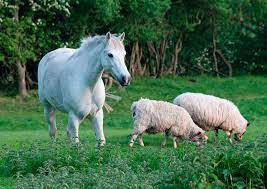

In [ ]:
cv2_imshow(input_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

In [ ]:
input_image.shape

(189, 267, 3)

In [ ]:
input_image = tf.convert_to_tensor(input_image)

In [ ]:
H, W, C = input_image.shape

H, W, C

(189, 267, 3)

In [ ]:
#input_image = tf.image.resize(input_image, (1024, 1024))  # Resize as needed
input_image = input_image[tf.newaxis, ...]

In [ ]:
input_image.shape

TensorShape([1, 189, 267, 3])

In [ ]:
results = model(input_image)

In [ ]:
empty_img = np.zeros((H, W, C))

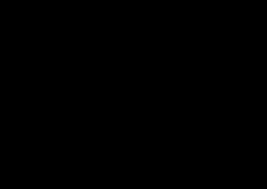

In [ ]:
cv2_imshow(empty_img)

In [ ]:
boxes = results['detection_boxes'].numpy()[0]

In [ ]:
masks = results['detection_masks'].numpy()[0]

In [ ]:
classIndexes = results['detection_classes'][0].numpy().astype(np.int32)
classScores = results['detection_scores'][0].numpy()

In [ ]:
classScores[0]

0.9997334

In [ ]:
img = cv2.imread(img_path)

## Object Detection

HORSE : 0.9997334 	 Coordinates: 35 33 130 149
SHEEP : 0.99892056 	 Coordinates: 128 98 209 149
SHEEP : 0.9986235 	 Coordinates: 173 92 248 141


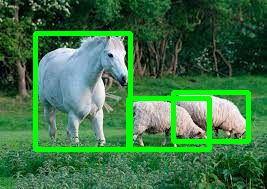

In [ ]:
for j in range(len(masks)):
  bbox = boxes[j]
  mask = masks[j]
  class_id = classIndexes[j]
  score = classScores[j]

  if score > 0.99:
    classLabelText = classessList[class_id].upper()
    #print(f'{classLabelText}: {score}')

    y1, x1, y2, x2 = int(bbox[0] * H), int(bbox[1] * W), int(bbox[2] * H), int(bbox[3] * W)

    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

    print(classLabelText, ":", score, "\t", "Coordinates:",x1, y1, x2, y2)
cv2_imshow(img)

## Semantic Segmentation

In [ ]:
img = cv2.imread(img_path)

HORSE : 0.9997334 	 Coordinates: 35 33 130 149
SHEEP : 0.99892056 	 Coordinates: 128 98 209 149
SHEEP : 0.9986235 	 Coordinates: 173 92 248 141


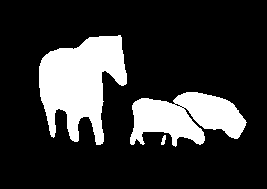

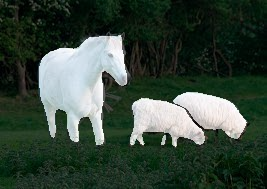

In [ ]:
for j in range(len(masks)):
  bbox = boxes[j]

  class_id = classIndexes[j]
  score = classScores[j]

  if score > 0.9:
    classLabelText = classessList[class_id].upper()
    mask = masks[j]

    y1, x1, y2, x2 = int(bbox[0] * H), int(bbox[1] * W), int(bbox[2] * H), int(bbox[3] * W)

    mask = cv2.resize(mask, (x2 - x1, y2 - y1), interpolation=cv2.INTER_LINEAR)


    _, mask = cv2.threshold(mask, 0.5, 1, cv2.THRESH_BINARY)


    for c in range(3):
      empty_img[y1:y2, x1:x2, c] = (1 - mask) * empty_img[y1:y2, x1:x2, c] + mask

    print(classLabelText, ":", score, "\t", "Coordinates:",x1, y1, x2, y2)

overlay = ((0.6 * empty_img*255) + (0.4 * img))

#cv2_imshow(img)
cv2_imshow(empty_img * 255)
cv2_imshow(overlay)

## Instance Segmentation

HORSE : 0.9997334 	 Coordinates: 35 33 130 149
SHEEP : 0.99892056 	 Coordinates: 128 98 209 149
SHEEP : 0.9986235 	 Coordinates: 173 92 248 141


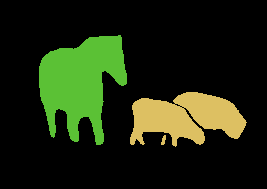

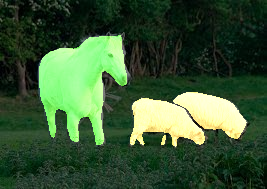

In [ ]:
for j in range(len(masks)):
  bbox = boxes[j]

  class_id = classIndexes[j]
  score = classScores[j]

  if score > 0.5:
    classLabelText = classessList[class_id].upper()
    mask = masks[j]

    y1, x1, y2, x2 = int(bbox[0] * H), int(bbox[1] * W), int(bbox[2] * H), int(bbox[3] * W)

    mask = cv2.resize(mask, (x2 - x1, y2 - y1), interpolation=cv2.INTER_LINEAR)


    _, mask = cv2.threshold(mask, 0.5, 1, cv2.THRESH_BINARY)

    color = colorList[class_id]
    alpha=1
    for c in range(3):
      #print("colorList:",colorList[class_id])
      #empty_img[y1:y2, x1:x2, c] = mask * colorList[class_id][c]
      #empty_img[y1:y2, x1:x2, c] =  colorList[class_id][c] * mask
      #empty_img[y1:y2, x1:x2, c] =  1 * [0, 0, 255][c] * mask
      #empty_img[y1:y2, x1:x2, c] = (1 - alpha) * empty_img[y1:y2, x1:x2, c] + alpha * color[c] * mask
      empty_img[y1:y2, x1:x2, c] = (1 - mask) * empty_img[y1:y2, x1:x2, c] + mask * color[c]

    print(classLabelText, ":", score, "\t", "Coordinates:",x1, y1, x2, y2)

overlay = ((1 * empty_img) + (0.5 * img))

# cv2_imshow(img)
cv2_imshow(empty_img)
cv2_imshow(overlay)

In [ ]:
# for j in range(len(masks)):
#     bbox = boxes[j]
#     class_id = classIndexes[j]
#     score = classScores[j]

#     if score > 0.9:
#         print(score)
#         mask = masks[j]

#         y1, x1, y2, x2 = int(bbox[0] * H), int(bbox[1] * W), int(bbox[2] * H), int(bbox[3] * W)

#         # Ensure the mask is binary
#         mask = cv2.resize(mask, (x2 - x1, y2 - y1), interpolation=cv2.INTER_LINEAR)
#         _, mask = cv2.threshold(mask, 0.5, 1, cv2.THRESH_BINARY)

#         # Create a color mask based on the class ID
#         # You can define colors for different classes
#         if class_id == 17:
#             color = (0, 255, 0)  # Class 1 (for example, green)
#         elif class_id == 18:
#             color = (255, 0, 0)  # Class 2 (for example, red)

#         # Apply the color mask to the empty_img with full opacity only in the masked region
#         for c in range(3):
#             empty_img[y1:y2, x1:x2, c] = (1 - mask) * empty_img[y1:y2, x1:x2, c] + mask * color[c]

# # Display the result
# overlay = ((1 * empty_img) + (1 * img))
# cv2_imshow(img)
# cv2_imshow(empty_img)
# cv2_imshow(overlay)

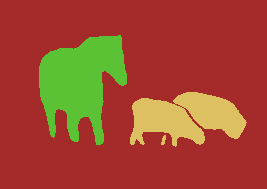

In [ ]:
# Define the background color (e.g., white)
background_color = (42, 42, 165)  # White color in BGR format

# Create a mask for the background using an inverse of the object masks
background_mask = np.ones_like(empty_img)
for j in range(len(masks)):
    bbox = boxes[j]
    class_id = classIndexes[j]
    score = classScores[j]

    if score > 0.9:
        mask = masks[j]

        y1, x1, y2, x2 = int(bbox[0] * H), int(bbox[1] * W), int(bbox[2] * H), int(bbox[3] * W)

        # Ensure the mask is binary
        mask = cv2.resize(mask, (x2 - x1, y2 - y1), interpolation=cv2.INTER_LINEAR)
        _, mask = cv2.threshold(mask, 0.5, 1, cv2.THRESH_BINARY)

        # Apply the mask to the background_mask
        for c in range(3):
            background_mask[y1:y2, x1:x2, c] = (1 - mask) * background_mask[y1:y2, x1:x2, c]

# # Apply the background color to the background_mask
for c in range(3):
    background_mask[:, :, c] = background_mask[:, :, c] * background_color[c]

# Combine the background_mask with the instance segmentation results (empty_img)
result = empty_img + background_mask

# Display the result
cv2_imshow(result)

In [ ]:
# Define the background color (e.g., white)
background_color = (42, 42, 165)  # White color in BGR format

# Create a mask for the background using an inverse of the object masks
background_mask = np.ones_like(empty_img)
for j in range(len(masks)):
    bbox = boxes[j]
    class_id = classIndexes[j]
    score = classScores[j]

    if score > 0.9:
        mask = masks[j]

        y1, x1, y2, x2 = int(bbox[0] * H), int(bbox[1] * W), int(bbox[2] * H), int(bbox[3] * W)

        # Ensure the mask is binary
        mask = cv2.resize(mask, (x2 - x1, y2 - y1), interpolation=cv2.INTER_LINEAR)
        _, mask = cv2.threshold(mask, 0.5, 1, cv2.THRESH_BINARY)

        # Apply the mask to the background_mask
        for c in range(3):
            background_mask[y1:y2, x1:x2, c] = (1 - mask) * background_mask[y1:y2, x1:x2, c]


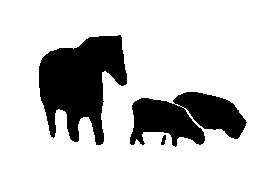

In [ ]:
cv2_imshow(background_mask*255)